In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSVs
nodes_df = pd.read_csv("week5_tutorial_nodes.csv")
edges_df = pd.read_csv("week5_tutorial_edges.csv")

# Create graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(row['name'], type=row['type'], gender=row['gender'], region=row['region'])

for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])


In [2]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is the network connected?", nx.is_connected(G))

# Node degrees
for node in G.nodes():
    print(f"{node}: Degree = {G.degree(node)}")


Number of nodes: 8
Number of edges: 10
Is the network connected? True
Aisha: Degree = 2
Ben: Degree = 3
Chloe: Degree = 3
David: Degree = 2
Elena: Degree = 3
Farid: Degree = 2
Grace: Degree = 3
Hugo: Degree = 2


In [3]:
# Betweenness Centrality
centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:")
for k, v in centrality.items():
    print(f"{k}: {round(v, 3)}")

# Clustering Coefficient
clustering = nx.clustering(G)
print("\nClustering Coefficient:")
for k, v in clustering.items():
    print(f"{k}: {round(v, 2)}")

Betweenness Centrality:
Aisha: 0.159
Ben: 0.175
Chloe: 0.198
David: 0.056
Elena: 0.294
Farid: 0.0
Grace: 0.254
Hugo: 0.056

Clustering Coefficient:
Aisha: 0
Ben: 0.33
Chloe: 0
David: 0
Elena: 0
Farid: 1.0
Grace: 0.33
Hugo: 0


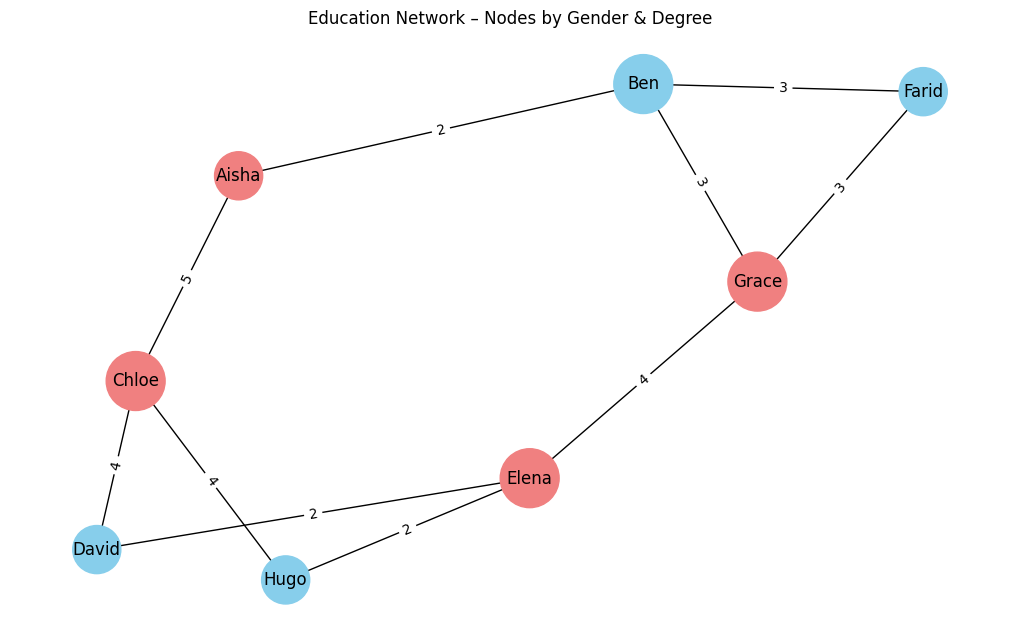

In [4]:
# Layout and attributes
pos = nx.spring_layout(G, seed=42)
gender_colors = {'Male': 'skyblue', 'Female': 'lightcoral'}
node_colors = [gender_colors[G.nodes[n]['gender']] for n in G.nodes]
node_sizes = [G.degree(n) * 600 for n in G.nodes]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Education Network – Nodes by Gender & Degree")
plt.show()

After removal, is connected? True


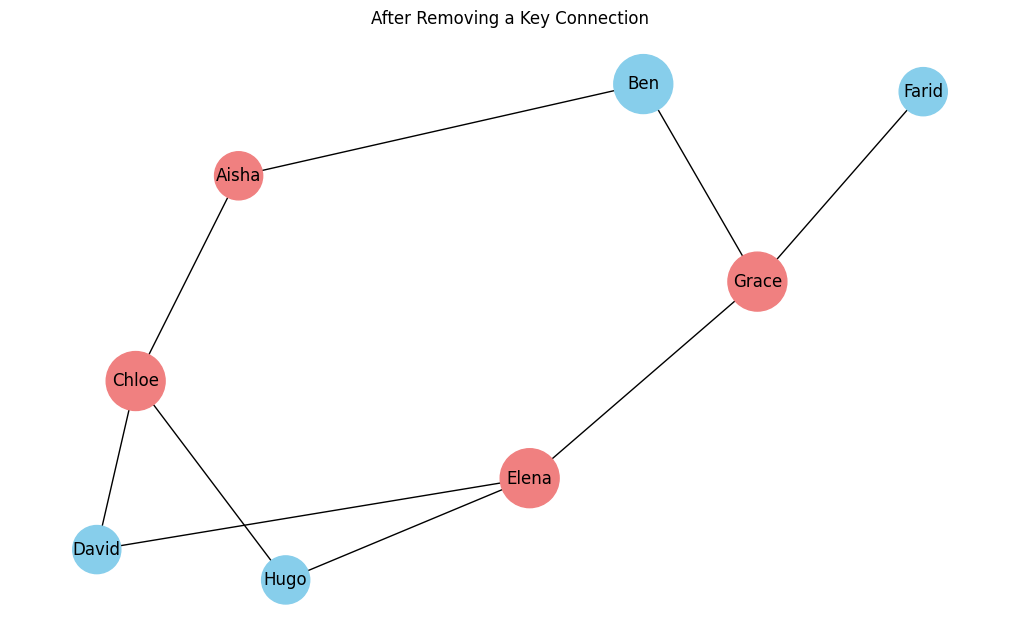

In [5]:
# Try disconnecting a node
G.remove_edge("Ben", "Farid")
print("After removal, is connected?", nx.is_connected(G))

# Re-plot the updated graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes)
plt.title("After Removing a Key Connection")
plt.show()

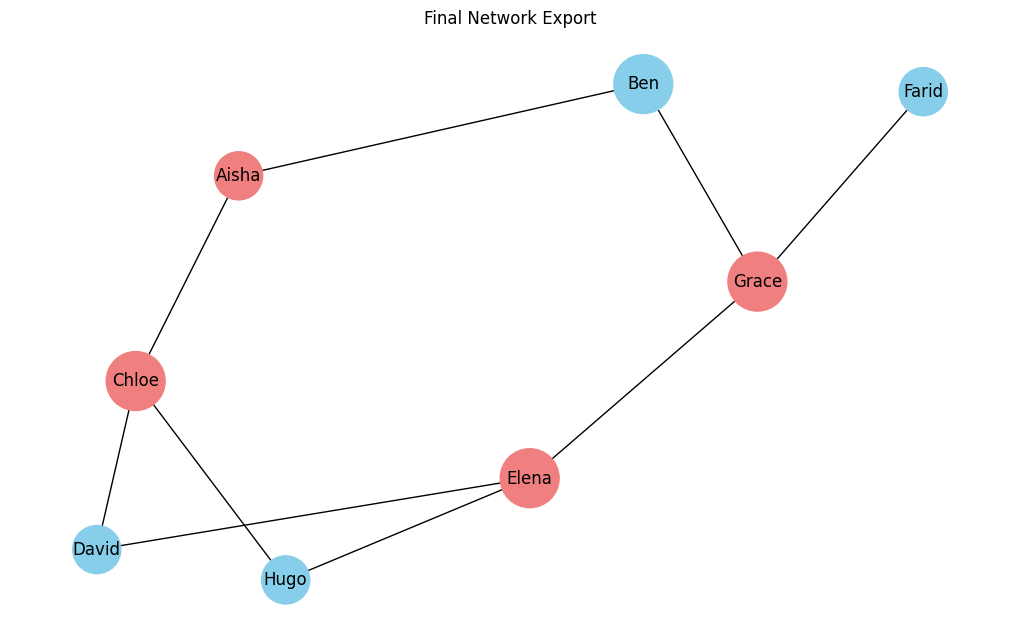

In [6]:
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes)
plt.title("Final Network Export")
plt.savefig("week5_network_final.png")
plt.show()